**AUDU Bastien, PISCIONE Thomas**

In [105]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Models

In [106]:
class Perc:
    def __init__(self, input_size=4):
        self.input_size = input_size
        self.weight = np.random.rand(1, input_size)

    def predict(self, x):
        return np.dot(self.weight, x)

    def reset(self):
        self.weight = np.random.rand(1, self.input_size)

In [107]:
def predict(XDeTest, perceptrons=None):
    if perceptrons is None:
        print("Erreur : Liste de perceptrons vide")
    result = []
    for i in range(0, len(perceptrons)):
        result.append(perceptrons[i].predict(XDeTest))
    proba = np.array(result)
    algo = proba.argmax()+1
    return algo

def predictAll(XALL, perceptrons=None):
    if perceptrons is None:
        perceptrons = []
    if len(perceptrons) == 0:
        print("Erreur : liste de perceptrons vide")
        return
    ret = np.zeros(len(XALL))
    for i in range(0, len(XALL)):
        ret[i] = predict(XALL[i], perceptrons)
    return ret


def fit(XdeTrain, YDeTrain, epochs=500, eta=0.1, nbClasses=3, input_size=4):
    perceptrons = []
    for i in range(nbClasses):
        perceptrons.append(Perc(input_size=input_size))
    for epoch in range(0, epochs):
        for i in range(len(XdeTrain)):
            donneeX = XdeTrain[i]
            donneeY = YDeTrain[i]

            YPredict = []
            for j in range(0, nbClasses):
                YPredict.append(perceptrons[j].predict(donneeX))

            for result in range(0, nbClasses):
                if donneeY == result+1:
                    if YPredict[result] <= 0:
                        perceptrons[result].weight += eta*donneeX
                else:
                    if YPredict[result] >= 0:
                        perceptrons[result].weight -= eta*donneeX
    return perceptrons


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
def matrix(YPred, YTest):
    cm = confusion_matrix(YTest, YPred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print("Accuracy {:.2f}% ".format(accuracy_score(y_true=YTest, y_pred=YPred)*100))
    for i in range(0, len(np.unique(YTest))):
        print("Precision classe {0} : {1:.2f}%".format(i+1, precision_score(y_true=YTest, y_pred=YPred, average=None)[i]*100))
        print("Recall classe {0} : {1:.2f}%".format(i+1, recall_score(y_true=YTest, y_pred=YPred, average=None)[i]*100))

In [109]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


def complet(fichier):
    complet=pd.read_csv("./{0}".format(fichier), delim_whitespace=True, header=None)
    X_complete=complet.iloc[:,:-1].values
    Y_complete=complet.iloc[:, -1].values
    nbClasses = len(np.unique(Y_complete))
    input_size = len(X_complete[0])
    X_complete_train, X_complete_test, Y_complete_train, Y_complete_test = train_test_split(X_complete, Y_complete, test_size = 1/3, random_state = 1)
    SS_complete = StandardScaler()
    SS_complete.fit(X_complete_train)
    X_complete_train_norm = SS_complete.transform(X_complete_train)
    X_complete_test_norm = SS_complete.transform(X_complete_test)
    print("\n\n{0} Predict".format(fichier))
    perc = fit(X_complete_train, Y_complete_train, epochs=1000, eta=0.01, nbClasses=nbClasses, input_size=input_size)
    matrix(predictAll(X_complete_test, perceptrons=perc), Y_complete_test)
    print("\n\n{0} Predict Normalized".format(fichier))
    perc = fit(X_complete_train_norm, Y_complete_train, epochs=1000, eta=0.01, nbClasses=nbClasses, input_size=input_size)
    matrix(predictAll(X_complete_test_norm, perceptrons=perc), Y_complete_test)
    print("\n\n{0} MLPClassifier".format(fichier))
    MLP = MLPClassifier(random_state=1)
    MLP.fit(X_complete_train, Y_complete_train)
    YMLP = MLP.predict(X_complete_test)
    matrix(YMLP, Y_complete_test)
    print("\n\n{0} MLPClassifier Normalized".format(fichier))
    MLP = MLPClassifier(random_state=1)
    MLP.fit(X_complete_train_norm, Y_complete_train)
    YMLP = MLP.predict(X_complete_test_norm)
    matrix(YMLP, Y_complete_test)

## Iris



iris.txt Predict


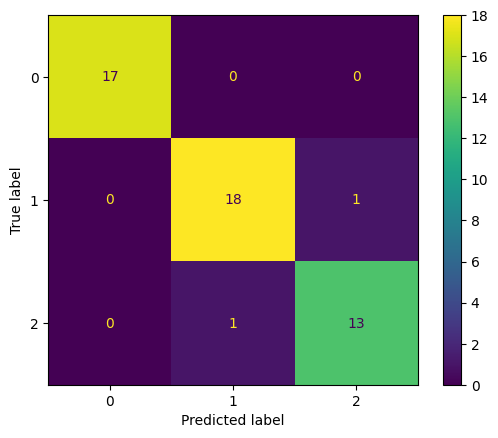

Accuracy 96.00% 
Precision classe 1 : 100.00%
Recall classe 1 : 100.00%
Precision classe 2 : 94.74%
Recall classe 2 : 94.74%
Precision classe 3 : 92.86%
Recall classe 3 : 92.86%


iris.txt Predict Normalized


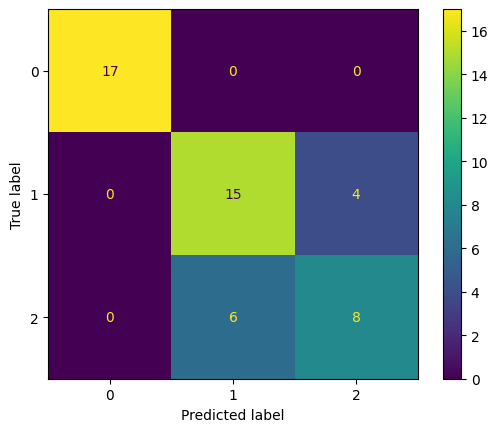

Accuracy 80.00% 
Precision classe 1 : 100.00%
Recall classe 1 : 100.00%
Precision classe 2 : 71.43%
Recall classe 2 : 78.95%
Precision classe 3 : 66.67%
Recall classe 3 : 57.14%


iris.txt MLPClassifier


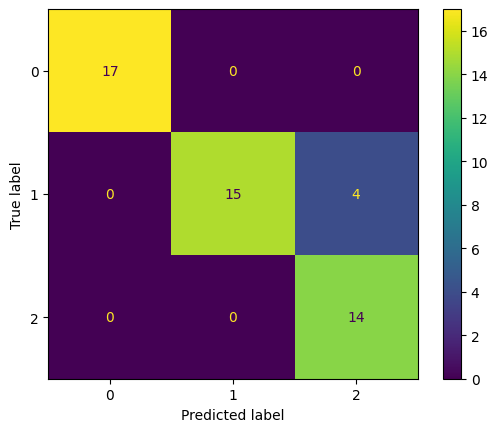

Accuracy 92.00% 
Precision classe 1 : 100.00%
Recall classe 1 : 100.00%
Precision classe 2 : 100.00%
Recall classe 2 : 78.95%
Precision classe 3 : 77.78%
Recall classe 3 : 100.00%


iris.txt MLPClassifier Normalized


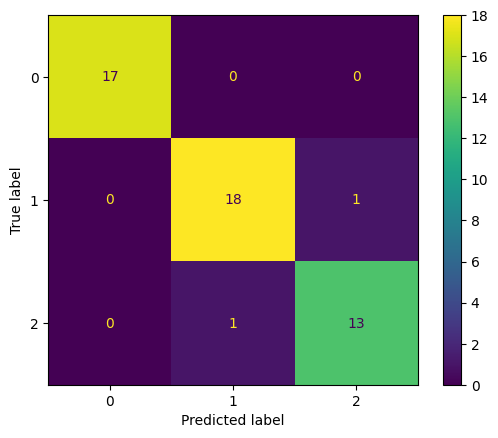

Accuracy 96.00% 
Precision classe 1 : 100.00%
Recall classe 1 : 100.00%
Precision classe 2 : 94.74%
Recall classe 2 : 94.74%
Precision classe 3 : 92.86%
Recall classe 3 : 92.86%


In [110]:
complet("iris.txt")

## Lsun



Lsun.txt Predict


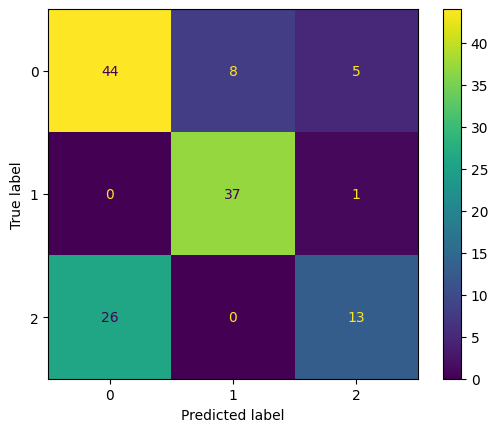

Accuracy 70.15% 
Precision classe 1 : 62.86%
Recall classe 1 : 77.19%
Precision classe 2 : 82.22%
Recall classe 2 : 97.37%
Precision classe 3 : 68.42%
Recall classe 3 : 33.33%


Lsun.txt Predict Normalized


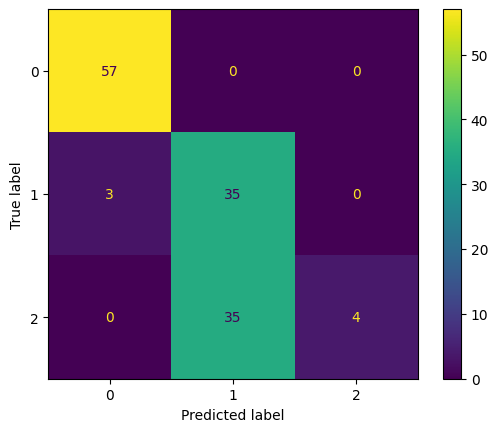

Accuracy 71.64% 
Precision classe 1 : 95.00%
Recall classe 1 : 100.00%
Precision classe 2 : 50.00%
Recall classe 2 : 92.11%
Precision classe 3 : 100.00%
Recall classe 3 : 10.26%


Lsun.txt MLPClassifier


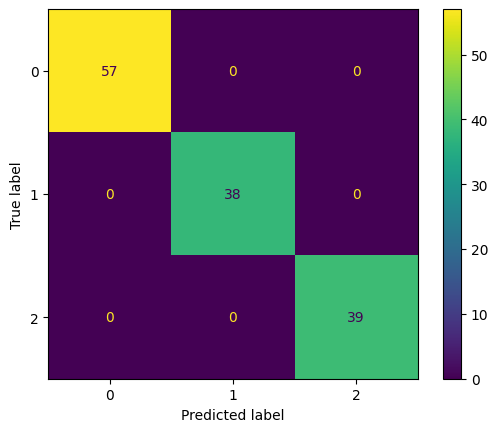

Accuracy 100.00% 
Precision classe 1 : 100.00%
Recall classe 1 : 100.00%
Precision classe 2 : 100.00%
Recall classe 2 : 100.00%
Precision classe 3 : 100.00%
Recall classe 3 : 100.00%


Lsun.txt MLPClassifier Normalized


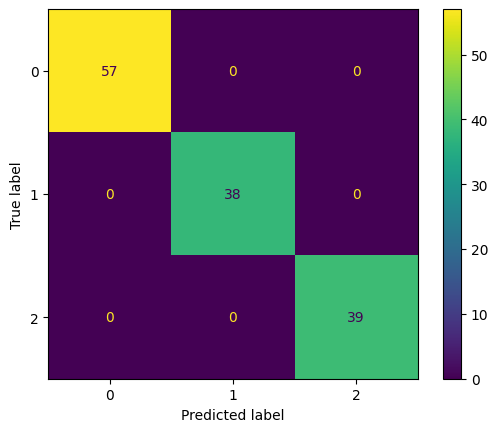

Accuracy 100.00% 
Precision classe 1 : 100.00%
Recall classe 1 : 100.00%
Precision classe 2 : 100.00%
Recall classe 2 : 100.00%
Precision classe 3 : 100.00%
Recall classe 3 : 100.00%


In [111]:
complet("Lsun.txt")

## Breast cancer



breast-cancer-wisconsin.txt Predict


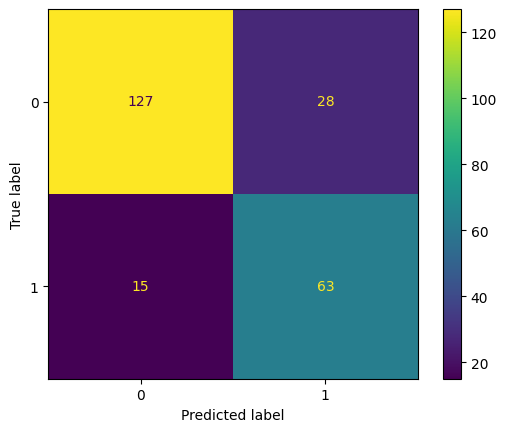

Accuracy 81.55% 
Precision classe 1 : 89.44%
Recall classe 1 : 81.94%
Precision classe 2 : 69.23%
Recall classe 2 : 80.77%


breast-cancer-wisconsin.txt Predict Normalized


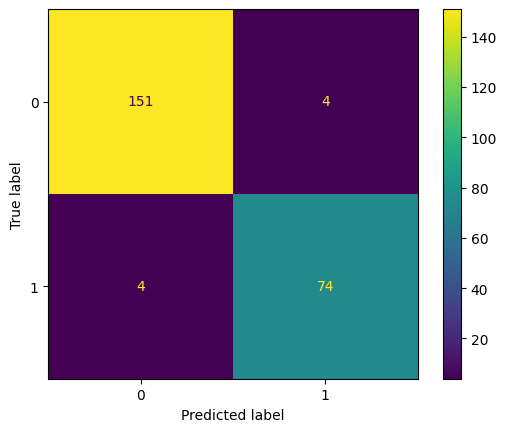

Accuracy 96.57% 
Precision classe 1 : 97.42%
Recall classe 1 : 97.42%
Precision classe 2 : 94.87%
Recall classe 2 : 94.87%


breast-cancer-wisconsin.txt MLPClassifier


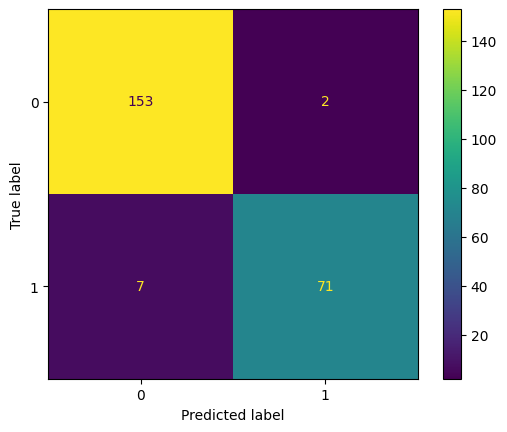

Accuracy 96.14% 
Precision classe 1 : 95.62%
Recall classe 1 : 98.71%
Precision classe 2 : 97.26%
Recall classe 2 : 91.03%


breast-cancer-wisconsin.txt MLPClassifier Normalized


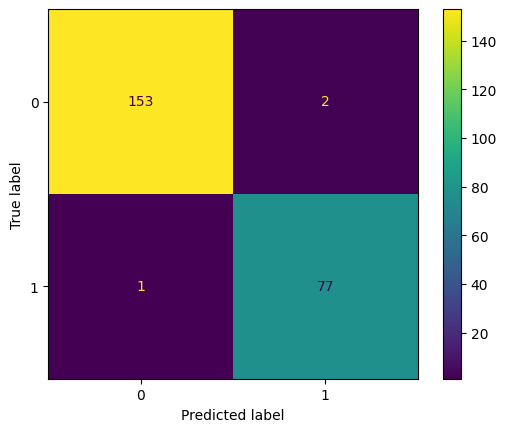

Accuracy 98.71% 
Precision classe 1 : 99.35%
Recall classe 1 : 98.71%
Precision classe 2 : 97.47%
Recall classe 2 : 98.72%


In [112]:
complet("breast-cancer-wisconsin.txt")

## Glass



glass.txt Predict


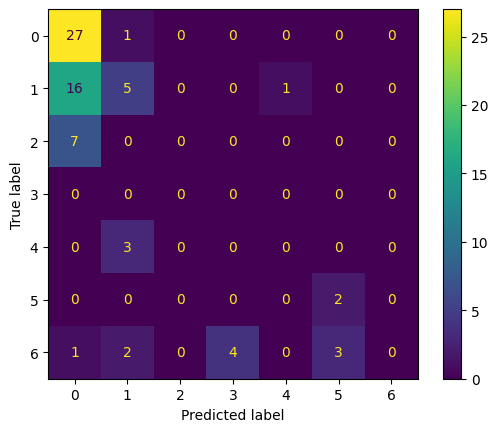

Accuracy 47.22% 
Precision classe 1 : 52.94%
Recall classe 1 : 96.43%
Precision classe 2 : 45.45%
Recall classe 2 : 22.73%
Precision classe 3 : 0.00%
Recall classe 3 : 0.00%
Precision classe 4 : 0.00%
Recall classe 4 : 0.00%
Precision classe 5 : 0.00%
Recall classe 5 : 0.00%
Precision classe 6 : 40.00%
Recall classe 6 : 100.00%


glass.txt Predict Normalized


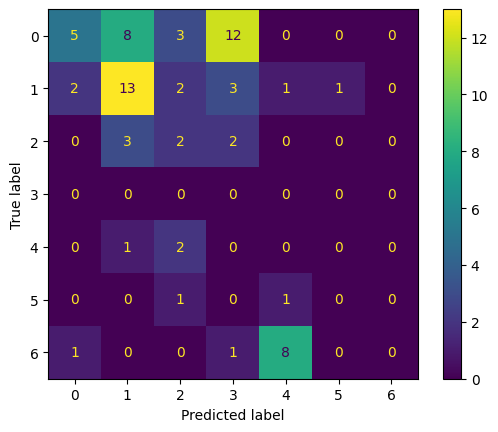

Accuracy 27.78% 
Precision classe 1 : 62.50%
Recall classe 1 : 17.86%
Precision classe 2 : 52.00%
Recall classe 2 : 59.09%
Precision classe 3 : 20.00%
Recall classe 3 : 28.57%
Precision classe 4 : 0.00%
Recall classe 4 : 0.00%
Precision classe 5 : 0.00%
Recall classe 5 : 0.00%
Precision classe 6 : 0.00%
Recall classe 6 : 0.00%


glass.txt MLPClassifier


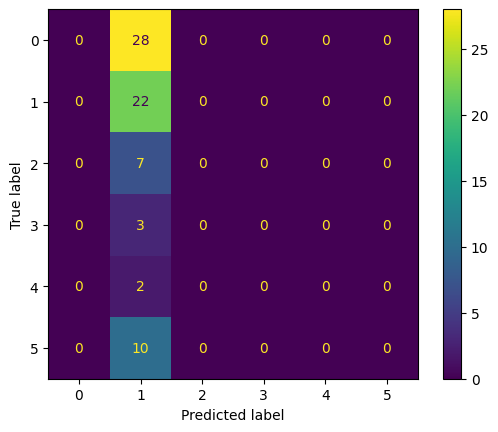

Accuracy 30.56% 
Precision classe 1 : 0.00%
Recall classe 1 : 0.00%
Precision classe 2 : 30.56%
Recall classe 2 : 100.00%
Precision classe 3 : 0.00%
Recall classe 3 : 0.00%
Precision classe 4 : 0.00%
Recall classe 4 : 0.00%
Precision classe 5 : 0.00%
Recall classe 5 : 0.00%
Precision classe 6 : 0.00%
Recall classe 6 : 0.00%


glass.txt MLPClassifier Normalized


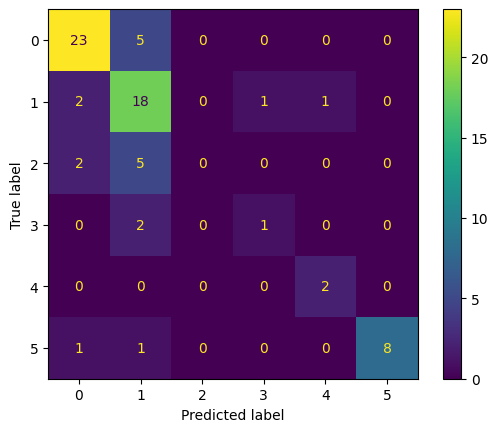

Accuracy 72.22% 
Precision classe 1 : 82.14%
Recall classe 1 : 82.14%
Precision classe 2 : 58.06%
Recall classe 2 : 81.82%
Precision classe 3 : 0.00%
Recall classe 3 : 0.00%
Precision classe 4 : 50.00%
Recall classe 4 : 33.33%
Precision classe 5 : 66.67%
Recall classe 5 : 100.00%
Precision classe 6 : 100.00%
Recall classe 6 : 80.00%


In [113]:
complet("glass.txt")

# Bagging

In [178]:
fichiers = ['iris.txt', 'Lsun.txt', 'breast-cancer-wisconsin.txt', 'glass.txt']

In [207]:
def echantillons(x_train, y_train, k=10):
    echantillons_x = []
    echantillons_y = []
    for i in range(0, k):
        echantillons_x.append([])
        echantillons_y.append([])
    #Creer une liste contenant tous les index
    index = []
    for i in range(0, len(x_train)):
        index.append(i)
    index = np.array(index)
    np.random.shuffle(index)

    #Attribuer les donnees de maniere aleatoire
    for i in range(0, len(x_train)):
        echantillons_x[i%k].append(x_train[index[i]])
        echantillons_y[i%k].append(y_train[index[i]])
    return echantillons_x, echantillons_y

def predict_bagging(x_test, perceptrons):
    YPredict = []
    for i in range(0, len(perceptrons)):
        YPredict.append(predictAll(x_test, perceptrons[i]))
    return np.array(YPredict)

def bagging(fichier=None, k=10, display=True, normalized=False):
    if display:
        print("\n\n{0} Bagging".format(fichier))
    donnees=pd.read_csv("./{0}".format(fichier), delim_whitespace=True, header=None)
    X=donnees.iloc[:,:-1].values
    Y=donnees.iloc[:, -1].values
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 1)
    if normalized:
        SS = StandardScaler()
        SS.fit(x_train)
        x_train = SS.transform(x_train)
        x_test = SS.transform(x_test)
    echantillons_x, echantillons_y = echantillons(x_train, y_train, k)

    percs = []
    for i in range(0, k):
        if display:
            print("{0} Bagging {1}".format(fichier, i))
        perc = fit(echantillons_x[i], echantillons_y[i], epochs=1000, eta=0.01, nbClasses=len(np.unique(Y)), input_size=len(X[0]))
        percs.append(perc)
    YPredict = predict_bagging(x_test, percs)
    # print(YPredict)
    #On convertit Ypredict en int
    YPredict = YPredict.astype(int)
    #Pour chaque colone, on ne garde que la classe la plus presente
    YPredict = np.apply_along_axis(lambda x: np.bincount(x).argmax(), 0, YPredict)
    if display:
        matrix(YPredict, y_test)
    return accuracy_score(y_test, YPredict)



In [210]:
for normalized in [True, False]:
    for fichier in fichiers:
        acc = []
        for k in range(2, 20):
            acc.append(bagging(fichier, k=k, display=False, normalized=normalized))
        bestK = np.argmax(np.array(acc))+2
        accBest = bagging(fichier=fichier, k=bestK, normalized=normalized, display=False)
        print("For {0}, best K is {1} with accuracy {2:.2f}%, normalized : {3}".format(fichier, bestK, accBest*100, normalized))

For iris.txt, best K is 7 with accuracy 74.00%, normalized : True
For Lsun.txt, best K is 5 with accuracy 99.25%, normalized : True
For breast-cancer-wisconsin.txt, best K is 8 with accuracy 97.00%, normalized : True
For glass.txt, best K is 7 with accuracy 45.83%, normalized : True
For iris.txt, best K is 4 with accuracy 86.00%, normalized : False
For Lsun.txt, best K is 12 with accuracy 82.84%, normalized : False
For breast-cancer-wisconsin.txt, best K is 17 with accuracy 81.55%, normalized : False
For glass.txt, best K is 8 with accuracy 38.89%, normalized : False
